In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import time
import numpy as np
import pandas as pd


In [ ]:
criteria = ['gini', 'entropy']
splitters = ['best', 'random']
max_depth_values = range(1, 50)

# 1 sekundowe pliki

## 13 cech

In [2]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_13_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_13_mfcc_features_with_labels_1sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [4]:
tree_results = []

for criterion in criteria:
    for splitter in splitters:
        for max_depth in max_depth_values:
            try:
                clf = DecisionTreeClassifier(
                    criterion=criterion,
                    splitter=splitter,
                    max_depth=max_depth,
                    random_state=42
                )
                
                start_time = time.time()
                clf.fit(X_train, y_train)
                training_time = time.time() - start_time
                
                y_pred = clf.predict(X_test)
                
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')
                
                tree_results.append({
                    'Criterion': criterion,
                    'Splitter': splitter,
                    'Max Depth': max_depth,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1 Score': f1,
                    'Training Time (s)': training_time
                })
            except Exception as e:
                print(f"Error with configuration criterion={criterion}, splitter={splitter}, max_depth={max_depth}: {e}")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_models = {metric: max(tree_results, key=lambda x: x[metric]) for metric in metrics}
best_models['Training Time'] = min(tree_results, key=lambda x: x['Training Time (s)'])

all_models_table = [
    [res['Criterion'], res['Splitter'], res['Max Depth'], res['Accuracy'], res['Precision'], 
     res['Recall'], res['F1 Score'], res['Training Time (s)']]
    for res in tree_results
]

best_models_table = [
    [metric, 
     best_models[metric]['Criterion'], 
     best_models[metric]['Splitter'], 
     best_models[metric]['Max Depth'], 
     best_models[metric]['Accuracy'], 
     best_models[metric]['Precision'], 
     best_models[metric]['Recall'], 
     best_models[metric]['F1 Score'], 
     best_models[metric]['Training Time (s)']]
    for metric in metrics + ['Training Time']
]

print("Best Models (Decision tree):")
print(tabulate(best_models_table, headers=[
    "Metric", "Criterion", "Splitter", "Max Depth", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))


Best Models for Each Metric:
╒═══════════════╤═════════════╤════════════╤═════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Metric        │ Criterion   │ Splitter   │   Max Depth │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═══════════════╪═════════════╪════════════╪═════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ Accuracy      │ entropy     │ best       │          22 │   0.911898 │    0.911823 │ 0.911898 │   0.911841 │          0.895203   │
├───────────────┼─────────────┼────────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ Precision     │ entropy     │ best       │          22 │   0.911898 │    0.911823 │ 0.911898 │   0.911841 │          0.895203   │
├───────────────┼─────────────┼────────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ Recall        │ entropy     │ best       │   

 Drzewa decyzyjne:
  Dokładność (Accuracy): 0.9119
  Precyzja (Precision): 0.9118
  Recall: 0.9119
  F1 Score: 0.9118
  Czas treningu: 0.8417 sekund

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1660
           1       0.85      0.85      0.85      1660
           2       0.89      0.88      0.88      1660
           3       0.97      0.97      0.97      1660

    accuracy                           0.91      6640
   macro avg       0.91      0.91      0.91      6640
weighted avg       0.91      0.91      0.91      6640



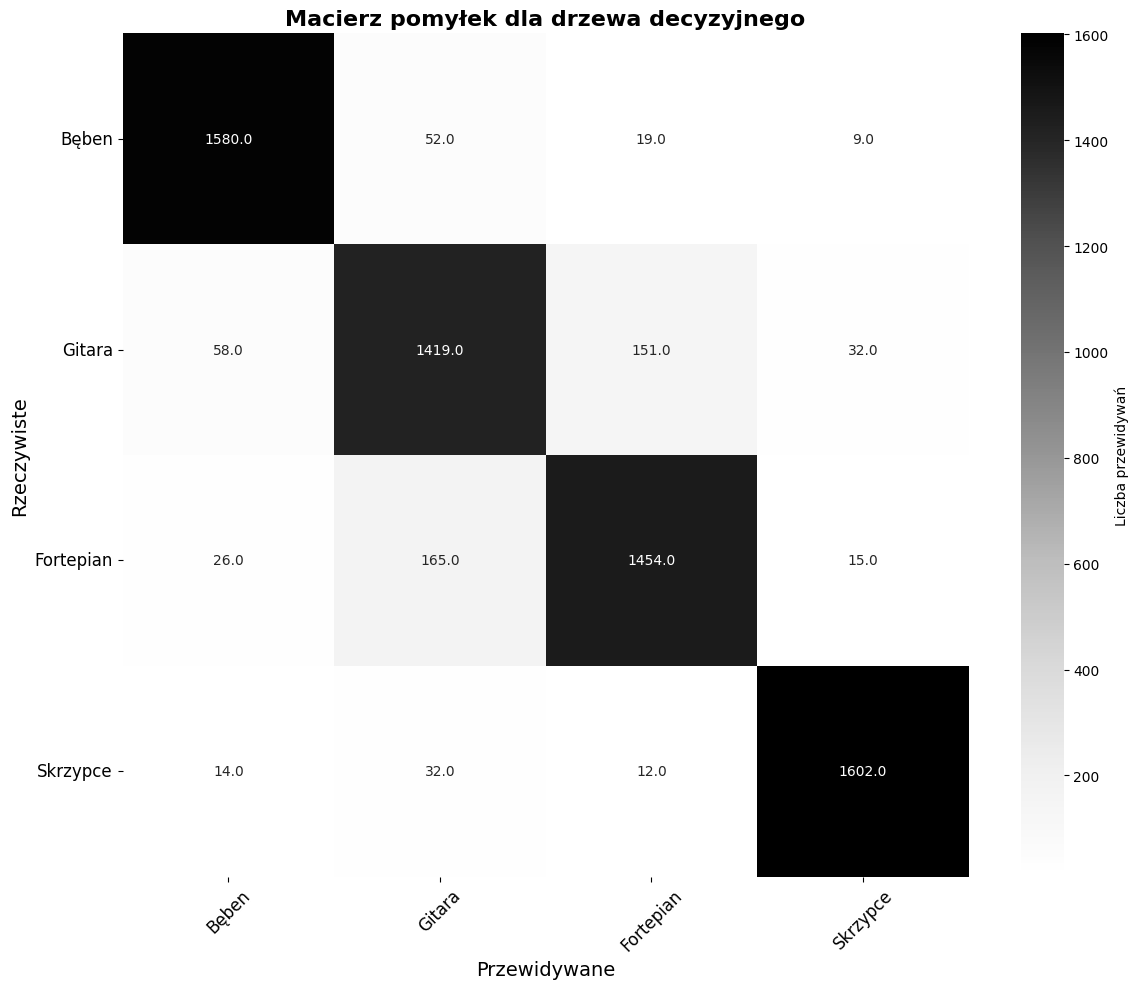

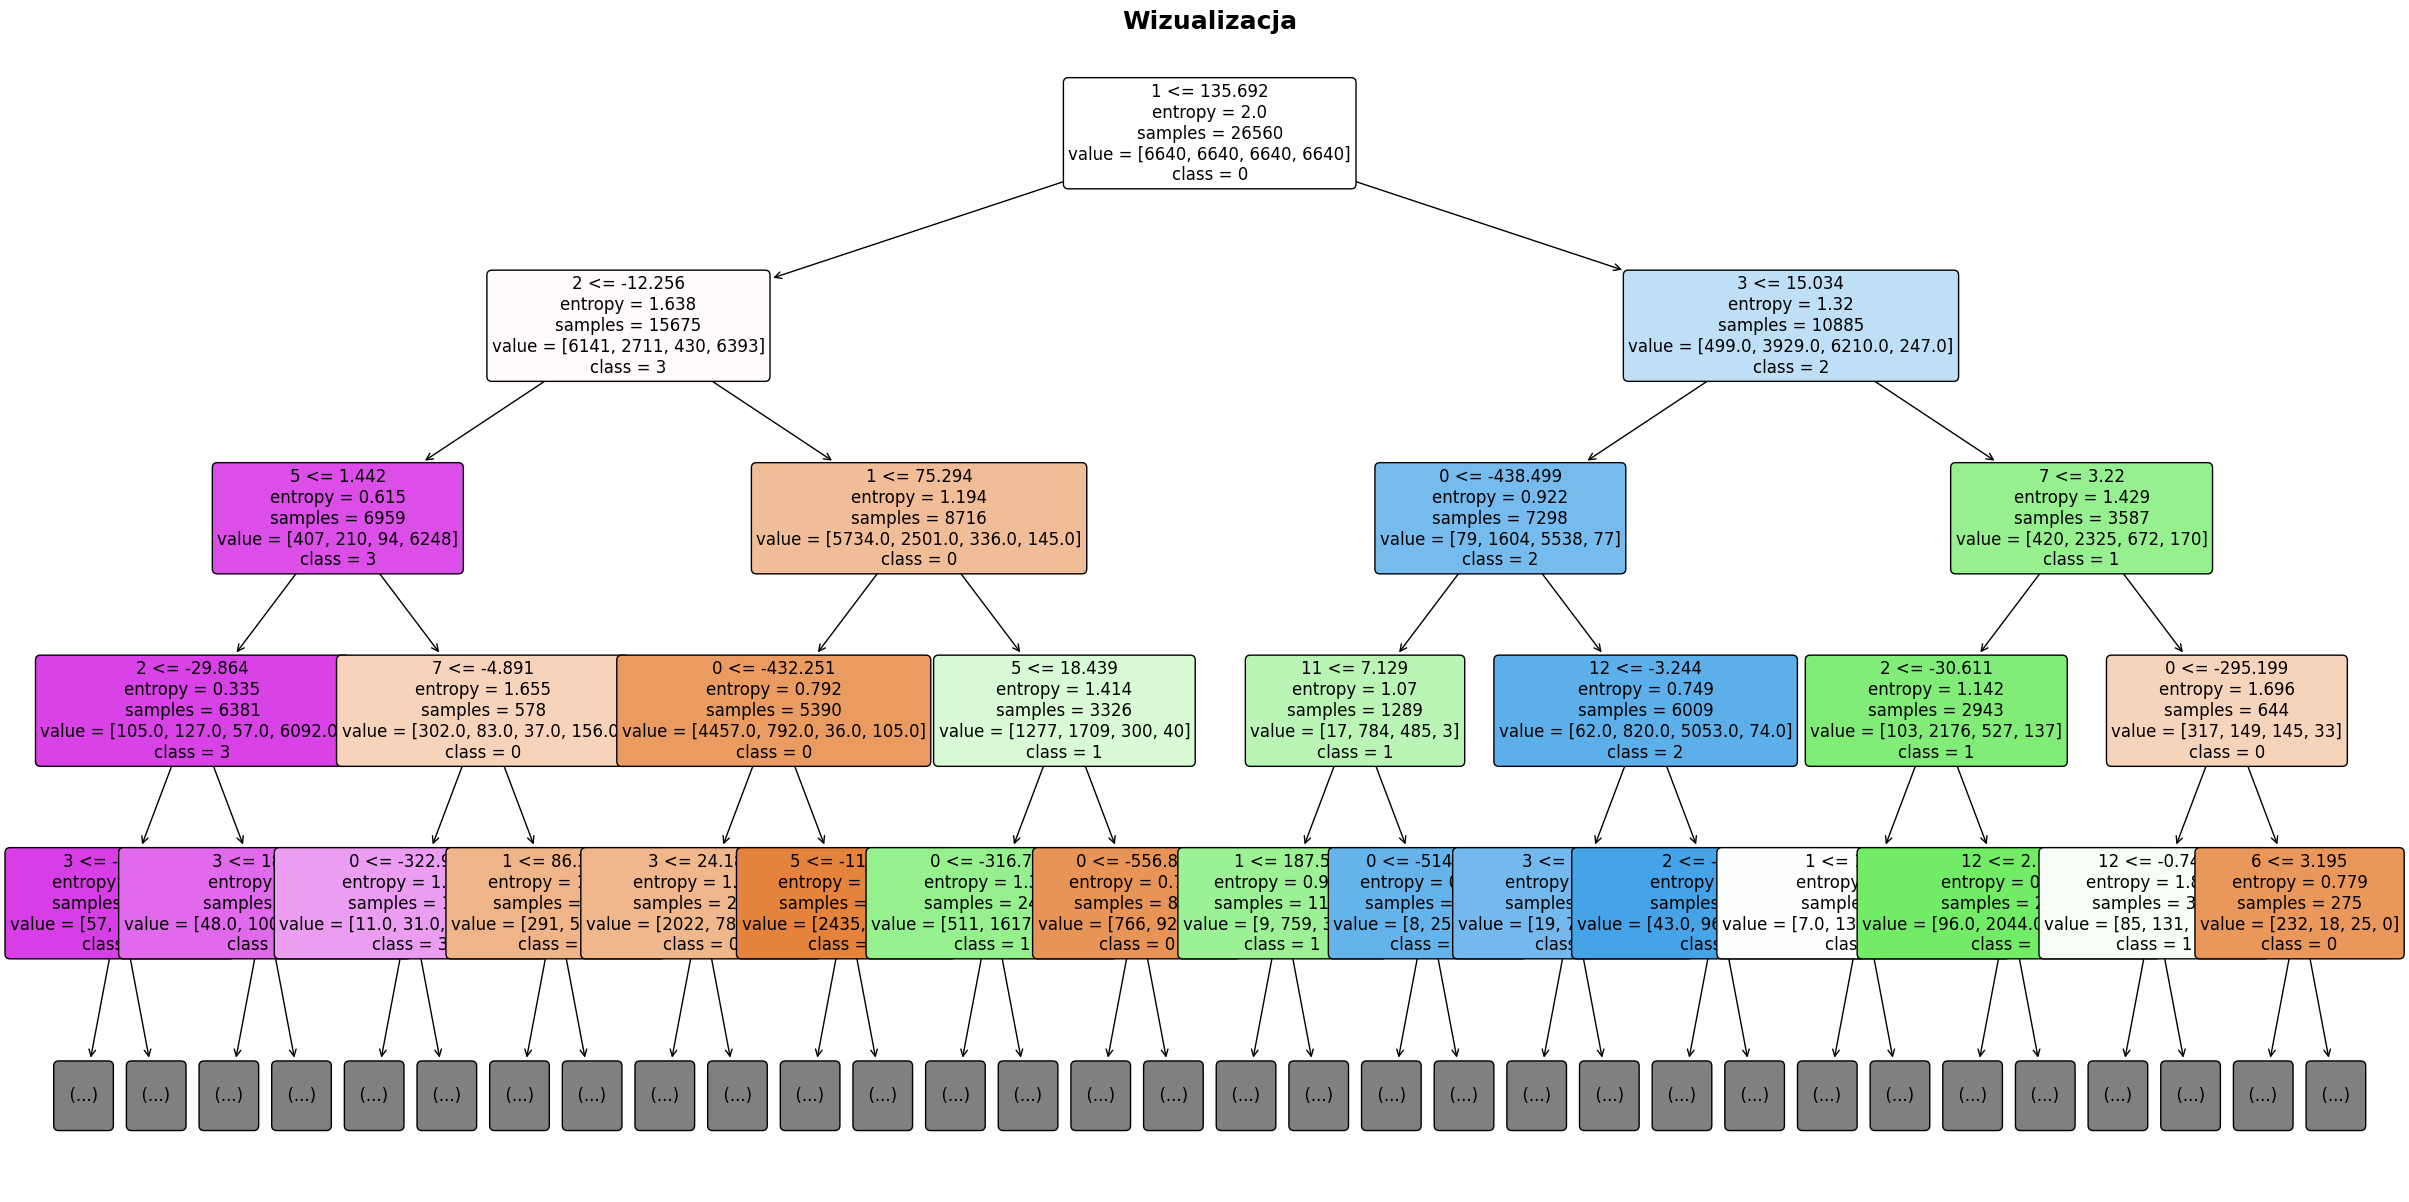

In [3]:
model = DecisionTreeClassifier(
    criterion='entropy',   
    splitter='best',    
    max_depth=22,       
    random_state=42
)

start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

unique_labels = y_test.unique()
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(" Drzewa decyzyjne:")
print(f"  Dokładność (Accuracy): {accuracy:.4f}")
print(f"  Precyzja (Precision): {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Czas treningu: {training_time:.4f} sekund")


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(label) for label in sorted(unique_labels)]))


label_mapping = {
    0: "Bęben",
    1: "Gitara",
    2: "Fortepian",
    3: "Skrzypce"
}


sorted_labels = np.sort(unique_labels)
mapped_labels = [label_mapping[label] for label in sorted_labels]
conf_matrix = confusion_matrix(y_test, y_pred, labels=sorted_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Greys", 
            xticklabels=mapped_labels, yticklabels=mapped_labels, cbar_kws={'label': 'Liczba przewidywań'})

plt.xlabel("Przewidywane", fontsize=14)
plt.ylabel("Rzeczywiste", fontsize=14)
plt.title("Macierz pomyłek dla drzewa decyzyjnego", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()


## 30 cech

In [16]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_30_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_30_mfcc_features_with_labels_1sec.csv")   

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [ ]:
tree_results = []

for criterion in criteria:
    for splitter in splitters:
        for max_depth in max_depth_values:
            try:
                clf = DecisionTreeClassifier(
                    criterion=criterion,
                    splitter=splitter,
                    max_depth=max_depth,
                    random_state=42
                )
                
                start_time = time.time()
                clf.fit(X_train, y_train)
                training_time = time.time() - start_time
                
                y_pred = clf.predict(X_test)
                
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')
                
                tree_results.append({
                    'Criterion': criterion,
                    'Splitter': splitter,
                    'Max Depth': max_depth,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1 Score': f1,
                    'Training Time (s)': training_time
                })
            except Exception as e:
                print(f"Error with configuration criterion={criterion}, splitter={splitter}, max_depth={max_depth}: {e}")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_models = {metric: max(tree_results, key=lambda x: x[metric]) for metric in metrics}
best_models['Training Time'] = min(tree_results, key=lambda x: x['Training Time (s)'])

all_models_table = [
    [res['Criterion'], res['Splitter'], res['Max Depth'], res['Accuracy'], res['Precision'], 
     res['Recall'], res['F1 Score'], res['Training Time (s)']]
    for res in tree_results
]

best_models_table = [
    [metric, 
     best_models[metric]['Criterion'], 
     best_models[metric]['Splitter'], 
     best_models[metric]['Max Depth'], 
     best_models[metric]['Accuracy'], 
     best_models[metric]['Precision'], 
     best_models[metric]['Recall'], 
     best_models[metric]['F1 Score'], 
     best_models[metric]['Training Time (s)']]
    for metric in metrics + ['Training Time']
]

print("Best Models (Decision tree):")
print(tabulate(best_models_table, headers=[
    "Metric", "Criterion", "Splitter", "Max Depth", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

## 50 cech

In [18]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_50_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_50_mfcc_features_with_labels_1sec.csv")      

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [ ]:
tree_results = []

for criterion in criteria:
    for splitter in splitters:
        for max_depth in max_depth_values:
            try:
                clf = DecisionTreeClassifier(
                    criterion=criterion,
                    splitter=splitter,
                    max_depth=max_depth,
                    random_state=42
                )
                
                start_time = time.time()
                clf.fit(X_train, y_train)
                training_time = time.time() - start_time
                
                y_pred = clf.predict(X_test)
                
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')
                
                tree_results.append({
                    'Criterion': criterion,
                    'Splitter': splitter,
                    'Max Depth': max_depth,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1 Score': f1,
                    'Training Time (s)': training_time
                })
            except Exception as e:
                print(f"Error with configuration criterion={criterion}, splitter={splitter}, max_depth={max_depth}: {e}")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_models = {metric: max(tree_results, key=lambda x: x[metric]) for metric in metrics}
best_models['Training Time'] = min(tree_results, key=lambda x: x['Training Time (s)'])

all_models_table = [
    [res['Criterion'], res['Splitter'], res['Max Depth'], res['Accuracy'], res['Precision'], 
     res['Recall'], res['F1 Score'], res['Training Time (s)']]
    for res in tree_results
]

best_models_table = [
    [metric, 
     best_models[metric]['Criterion'], 
     best_models[metric]['Splitter'], 
     best_models[metric]['Max Depth'], 
     best_models[metric]['Accuracy'], 
     best_models[metric]['Precision'], 
     best_models[metric]['Recall'], 
     best_models[metric]['F1 Score'], 
     best_models[metric]['Training Time (s)']]
    for metric in metrics + ['Training Time']
]

print("Best Models (Decision tree):")
print(tabulate(best_models_table, headers=[
    "Metric", "Criterion", "Splitter", "Max Depth", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

# 3 sekundowe pliki

In [20]:
train_data = pd.read_csv("Sounds_3_seconds/mfcc_3_sec/train_13_mfcc_features_with_labels_3sec.csv")  
test_data = pd.read_csv("Sounds_3_seconds/mfcc_3_sec/test_13_mfcc_features_with_labels_3sec.csv")   

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [ ]:
tree_results = []

for criterion in criteria:
    for splitter in splitters:
        for max_depth in max_depth_values:
            try:
                clf = DecisionTreeClassifier(
                    criterion=criterion,
                    splitter=splitter,
                    max_depth=max_depth,
                    random_state=42
                )
                
                start_time = time.time()
                clf.fit(X_train, y_train)
                training_time = time.time() - start_time
                
                y_pred = clf.predict(X_test)
                
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')
                
                tree_results.append({
                    'Criterion': criterion,
                    'Splitter': splitter,
                    'Max Depth': max_depth,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1 Score': f1,
                    'Training Time (s)': training_time
                })
            except Exception as e:
                print(f"Error with configuration criterion={criterion}, splitter={splitter}, max_depth={max_depth}: {e}")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_models = {metric: max(tree_results, key=lambda x: x[metric]) for metric in metrics}
best_models['Training Time'] = min(tree_results, key=lambda x: x['Training Time (s)'])

all_models_table = [
    [res['Criterion'], res['Splitter'], res['Max Depth'], res['Accuracy'], res['Precision'], 
     res['Recall'], res['F1 Score'], res['Training Time (s)']]
    for res in tree_results
]

best_models_table = [
    [metric, 
     best_models[metric]['Criterion'], 
     best_models[metric]['Splitter'], 
     best_models[metric]['Max Depth'], 
     best_models[metric]['Accuracy'], 
     best_models[metric]['Precision'], 
     best_models[metric]['Recall'], 
     best_models[metric]['F1 Score'], 
     best_models[metric]['Training Time (s)']]
    for metric in metrics + ['Training Time']
]

print("Best Models (Decision tree):")
print(tabulate(best_models_table, headers=[
    "Metric", "Criterion", "Splitter", "Max Depth", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

# 5 sekundowe pliki

In [22]:
train_data = pd.read_csv("Sounds_5_seconds/mfcc_5_sec/train_13_mfcc_features_with_labels_5sec.csv")  
test_data = pd.read_csv("Sounds_5_seconds/mfcc_5_sec/test_13_mfcc_features_with_labels_5sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [ ]:
tree_results = []

for criterion in criteria:
    for splitter in splitters:
        for max_depth in max_depth_values:
            try:
                clf = DecisionTreeClassifier(
                    criterion=criterion,
                    splitter=splitter,
                    max_depth=max_depth,
                    random_state=42
                )
                
                start_time = time.time()
                clf.fit(X_train, y_train)
                training_time = time.time() - start_time
                
                y_pred = clf.predict(X_test)
                
                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')
                
                tree_results.append({
                    'Criterion': criterion,
                    'Splitter': splitter,
                    'Max Depth': max_depth,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1 Score': f1,
                    'Training Time (s)': training_time
                })
            except Exception as e:
                print(f"Error with configuration criterion={criterion}, splitter={splitter}, max_depth={max_depth}: {e}")

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_models = {metric: max(tree_results, key=lambda x: x[metric]) for metric in metrics}
best_models['Training Time'] = min(tree_results, key=lambda x: x['Training Time (s)'])

all_models_table = [
    [res['Criterion'], res['Splitter'], res['Max Depth'], res['Accuracy'], res['Precision'], 
     res['Recall'], res['F1 Score'], res['Training Time (s)']]
    for res in tree_results
]

best_models_table = [
    [metric, 
     best_models[metric]['Criterion'], 
     best_models[metric]['Splitter'], 
     best_models[metric]['Max Depth'], 
     best_models[metric]['Accuracy'], 
     best_models[metric]['Precision'], 
     best_models[metric]['Recall'], 
     best_models[metric]['F1 Score'], 
     best_models[metric]['Training Time (s)']]
    for metric in metrics + ['Training Time']
]

print("Best Models (Decision tree):")
print(tabulate(best_models_table, headers=[
    "Metric", "Criterion", "Splitter", "Max Depth", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))